In [9]:
## Test the polarization-analysis module
from obspy import Stream, Trace, UTCDateTime
from utils_pol import *
from numpy import sin, zeros, concatenate, linspace, hanning, pi

In [10]:
dt = 0.001
freq1 = 20
freq2 = 10

begin = 0
end = 2
winlen = 10
starttime = "2020-01-01T00:00:00.000000Z"


In [11]:
## Generate a test signal
numpts = int((end - begin) / dt)+1
timeax = linspace(begin, end, numpts)
timeax1 = timeax[0:int(numpts/2)]
timeax2 = timeax[int(numpts/2):]

sig1_z = sin(2*pi*freq1*timeax1)*hanning(len(timeax1))
sig1_n = zeros(len(timeax1))
#sig1_e = sin(2*pi*freq1*timeax1+pi/2)*hanning(len(timeax1))
sig1_e = sig1_z.copy()

sig2_z = sin(2*pi*freq2*timeax2)*hanning(len(timeax2))
sig2_n = zeros(len(timeax2))
#sig2_e = -sig2_z.copy()
sig2_e = 2*sin(2*pi*freq2*timeax2+pi/2)*hanning(len(timeax2))

sig_z = concatenate((sig1_z, sig2_z))
sig_n = concatenate((sig1_n, sig2_n))
sig_e = concatenate((sig1_e, sig2_e))

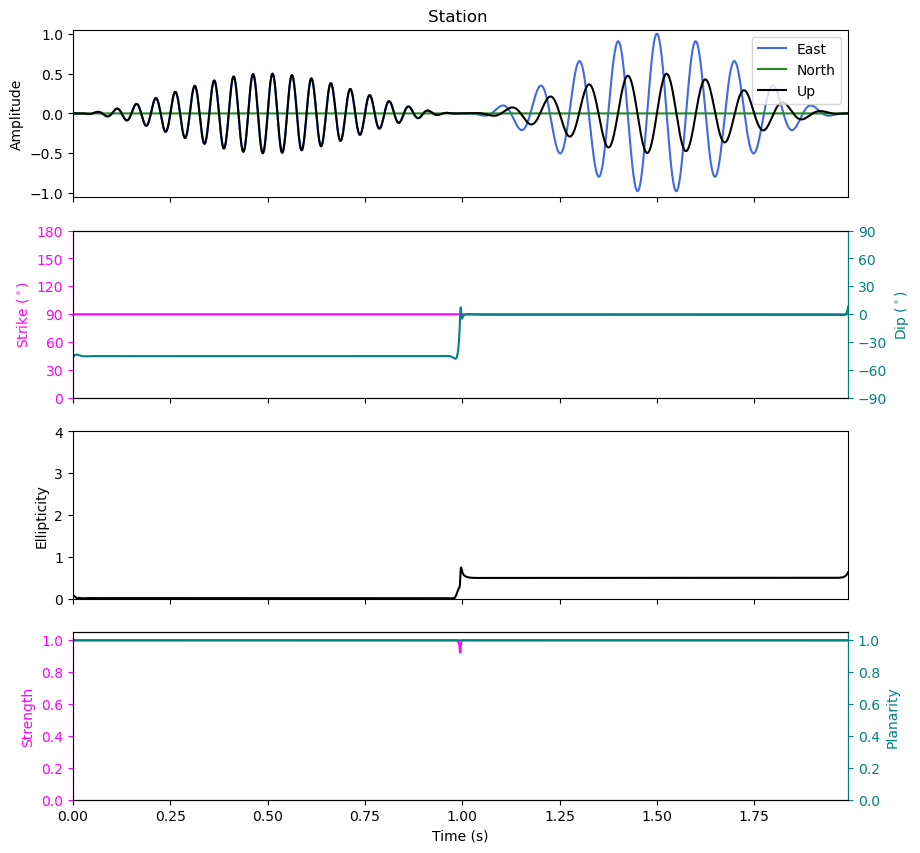

In [12]:
## Test the polarization analysis
# cov_mats = get_cov_mats(sig_e, sig_n, sig_z)
# eigvals, eigvecs = get_eigs(cov_mats, winlen=winlen)
# timeax_pol = timeax[:-(winlen-1)]

# print(eigvals[:, 500])
# print(eigvecs[:, 0, 500])
# print(eigvecs[:, 1, 500])
# print(eigvecs[:, 2, 500])

# eigvecs = rotate_to_maxreal(eigvecs)

# # print(eigvecs[:, 0, 500])
# # print(eigvecs[:, 1, 500])
# # print(eigvecs[:, 2, 500])
# # print("\n")

# eigvecs_max = eigvecs[:, 2, :]
# print(eigvecs_max[:, 500])
# print("\n")

 ##### Ellipticities
# realnorms = norm(real(eigvecs_max), axis=0)
# print(where(realnorms > 1))
# ellis = sqrt(1-realnorms**2)/realnorms

# strikes = arctan2(real(eigvecs_max[0, :]), real(eigvecs_max[1, :]))*180/pi
# print(strikes[500])
# print("\n")

# dips = arctan2(-real(eigvecs_max[2, :]), sqrt(real(eigvecs_max[0, :])**2 + real(eigvecs_max[1, :])**2))*180/pi
# print(dips[500])
# print("\n")

# pol_params = get_pol_from_eigs(eigvals, eigvecs)
# print(pol_params.strike[500])
# print(pol_params.dip[500])
# print("\n")

pol_params = get_pol_vidale(sig_e, sig_n, sig_z, winlen=winlen)
fig, axes = plot_waveforms_and_pols(sig_e, sig_n, sig_z, pol_params, timeax, winlen=winlen, station="")